In [17]:
%%sql
SELECT name
FROM cat
WHERE weight > 9
ORDER BY name ASC

Running query in 'sqlite:///catcafes.db'

name
Angel
Bella
Berlioz
Carlos
Chanel
Charlotte
Charly
Georges
Jack
Jiji


In [22]:
%%sql
SELECT name
FROM cat
WHERE weight > 9 AND color = 'black' OR 'white'
ORDER BY name ASC

Running query in 'sqlite:///catcafes.db'

name
Charly
Jack
Jiji
Mimi
Sylvester


In [38]:
%%sql
SELECT name
FROM cat
WHERE weight > 9 AND color = 'black' OR 'white'
ORDER BY name ASC
LIMIT 8

Running query in 'sqlite:///catcafes.db'

name
Charly
Jack
Jiji
Mimi
Sylvester


# task 4

In [49]:
%%sql
SELECT color, max(weight)
FROM cat
GROUP BY color
HAVING max(weight) > 10.5;

Running query in 'sqlite:///catcafes.db'

color,max(weight)
brown,10.88
cinnamon,11.37
lilac,10.76
red,12


# task 5

In [46]:
%%sql
SELECT cat.name, cat_cafe.cafe_id
FROM cat
JOIN cat_cafe ON cat.name = cat_cafe.active
WHERE cat.pattern = 'tortoiseshell' AND cat_cafe.active = True

Running query in 'sqlite:///catcafes.db'

name,cafe_id


# task 6

In [50]:
%%sql
    SELECT cat.name, cat_cafe.cafe_id
    FROM cat
    JOIN cat_cafe ON cat.id = cat_cafe.cat_id
    WHERE cat.pattern = 'tortoiseshell' AND cat_cafe.active = true;

Running query in 'sqlite:///catcafes.db'

name,cafe_id
Luna,2
Angel,4
Moritz,2
O'Malley,3
Lafayette,5


# task 6

In [53]:
%%sql
SELECT cat.name, cafe.name
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat.name = cafe.name
WHERE cat.pattern = 'tortoiseshell' AND cat_cafe.active = true

Running query in 'sqlite:///catcafes.db'

name,name_1


In [54]:
%%sql
SELECT cat.name, cafe.name
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat_cafe.cafe_id = cafe.id
WHERE cat.pattern = 'tortoiseshell' AND cat_cafe.active = true;

Running query in 'sqlite:///catcafes.db'

name,name_1
Luna,Independent Claws
Angel,Tall Tails
Moritz,Independent Claws
O'Malley,Paws and Play
Lafayette,Cats Meow


In [58]:
%%sql
SELECT DISTINCT(cafe.zipcode)
FROM cat
JOIN cat_cafe ON cat_cafe.cafe_id = cafe.id
WHERE cat.color = 'lilac' AND cat.pattern = 'tabby' AND cat_cafe.active = true

Running query in 'sqlite:///catcafes.db'

RuntimeError: (sqlite3.OperationalError) no such column: cafe.zipcode
[SQL: SELECT DISTINCT(cafe.zipcode)
FROM cat
JOIN cat_cafe ON cat_cafe.cafe_id = cafe.id
WHERE cat.color = 'lilac' AND cat.pattern = 'tabby' AND cat_cafe.active = true]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [59]:
%%sql
    SELECT DISTINCT cafe.zipcode
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat_cafe.cafe_id = cafe.id
WHERE cat.color = 'lilac' 
  AND cat.pattern = 'tabby' 
  AND cat_cafe.active = true;

Running query in 'sqlite:///catcafes.db'

zipcode
11215
11237


In [61]:
%%sql
SELECT cafe.name, avg(cat.weight)
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat_cafe.cafe_id = cafe.id
GROUP BY cafe.name

Running query in 'sqlite:///catcafes.db'

name,avg(cat.weight)
Cats Meow,9.42909090909091
Hang In There,9.412
Independent Claws,9.40857142857143
Paws and Play,9.517333333333333
Tall Tails,9.50625


In [64]:
%%sql
    SELECT cafe.name, count(cat.name)
    FROM cat
    JOIN cat_cafe ON cat.id = cat_cafe.cat_id
    JOIN cafe ON cat_cafe.cafe_id = cafe.id
    WHERE cat.pattern = 'tortoiseshell'
    GROUP BY cafe.name
    ORDER BY count(cat.name) DESC

Running query in 'sqlite:///catcafes.db'

name,count(cat.name)
Independent Claws,4
Tall Tails,3
Paws and Play,1
Hang In There,1
Cats Meow,1


In [70]:
cat_weight = %sql SELECT weight FROM cat

Running query in 'sqlite:///catcafes.db'

In [71]:
import pandas as pd
df = cat_weight.DataFrame()

In [72]:
import matplotlib.pyplot as plt

(array([ 2.,  3.,  8., 11.,  9.,  4.,  2.,  1.]),
 array([ 7.18  ,  7.7825,  8.385 ,  8.9875,  9.59  , 10.1925, 10.795 ,
        11.3975, 12.    ]),
 <BarContainer object of 8 artists>)

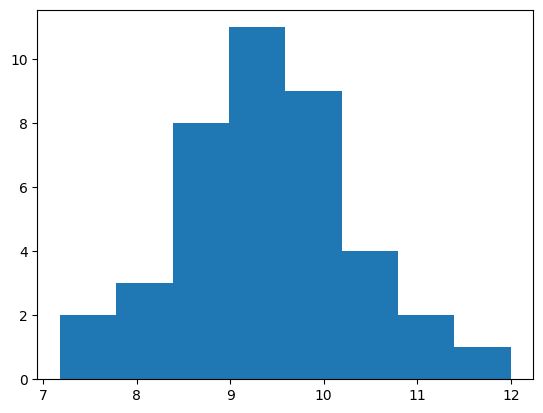

In [75]:
plt.hist(df['weight'], bins=8)